## Mandy's Breast Cancer Campaign Project Part 1

#### I know i need pandas and I believe I will need to encode, matplot and seaborn, so importing and creating variables

#### I'm following the order listed above but it came up that typically we might also visualize before the dimensional reduction and scaling so I will try to add a heatmap earlier also


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("hls", 8)
sns.set_palette("hls", 8)

encoder = LabelEncoder()

dataset = pd.read_csv('BCdata.csv') # Name here may need to be adjusted that is what I called it on my save however

#### Any duplicates?

In [2]:
print(sum(dataset.duplicated())) #No duplicates

0


#### See all the features we are starting with

In [3]:
list(dataset.columns.values)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

#### Are there any empty values?

In [4]:
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Yes, there was an unnamed column full of empty values, I'll reset the dataframe, and remove the empty column, the ID column that isn't needed and temporarily remove the label column in preperation for encoding 


In [5]:
df_features = dataset.drop(["id", "Unnamed: 32","diagnosis"], axis = 1)

df_features.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Let's do a starter heatmap to see what it looks like

Text(0.5, 1.0, 'Full Heatmap')

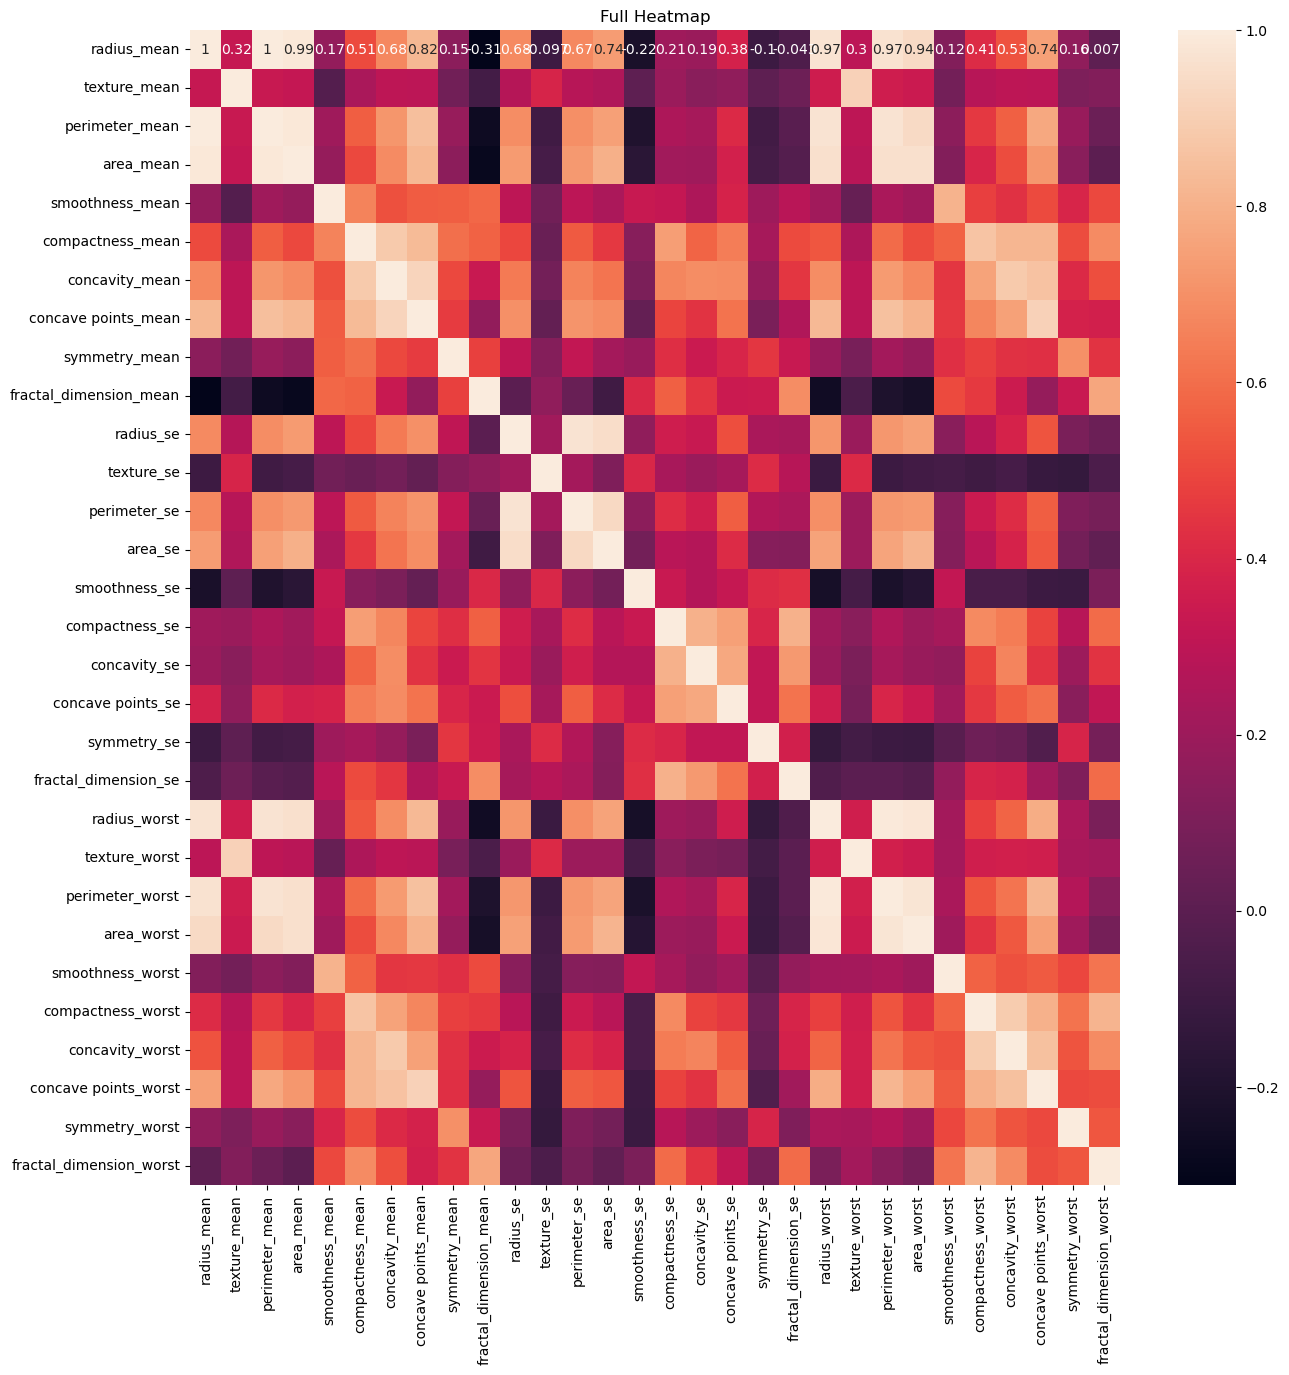

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df_features.corr(), annot=True).set_title("Full Heatmap")

#### We can also take a look at the original correlation table

In [7]:
print("Original Data Correlation Table"), display(df_features.corr())

Original Data Correlation Table


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


(None, None)

### Reasonings for my choices with Dimensional reduction 

#### Without a SME to compare I wanted it to feel manageable but also still have enough to see visuallizations.  I don't know the context of a lot of the specifics for the data so I tested at correlation thresholds of 0.95, 0.90, 0.80.  0.95 didn't feel like it removed enough, and 0.80 dropped it to 13 columns which felt like a lot.  I chose 0.90 as it dropped about 1/3 of the columns with closest mathematical correlation and which seemed partially reduntant. I chose to do it with Iterating Pairs as it seemed more complicated than the manual and I wanted to have applicable practice doing it for my own learning and knowledge.

In [8]:

# the correlation I want it below to find meaninful features
correlation_threshold = 0.90



correlated_pairs = np.abs(df_features.corr()) > correlation_threshold
print("\nCorrelation Table with Filter Applied:"), display(correlated_pairs)



Correlation Table with Filter Applied:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


(None, None)

In [9]:
# Iterate through consecutive pairs of columns
correlated_pairs = np.column_stack(np.where(np.abs(df_features.corr()) > correlation_threshold))
print("Position in table (row, column) of Correlated columns above threshold:"), display(correlated_pairs)

Position in table (row, column) of Correlated columns above threshold:


array([[ 0,  0],
       [ 0,  2],
       [ 0,  3],
       [ 0, 20],
       [ 0, 22],
       [ 0, 23],
       [ 1,  1],
       [ 1, 21],
       [ 2,  0],
       [ 2,  2],
       [ 2,  3],
       [ 2, 20],
       [ 2, 22],
       [ 2, 23],
       [ 3,  0],
       [ 3,  2],
       [ 3,  3],
       [ 3, 20],
       [ 3, 22],
       [ 3, 23],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 6,  7],
       [ 7,  6],
       [ 7,  7],
       [ 7, 27],
       [ 8,  8],
       [ 9,  9],
       [10, 10],
       [10, 12],
       [10, 13],
       [11, 11],
       [12, 10],
       [12, 12],
       [12, 13],
       [13, 10],
       [13, 12],
       [13, 13],
       [14, 14],
       [15, 15],
       [16, 16],
       [17, 17],
       [18, 18],
       [19, 19],
       [20,  0],
       [20,  2],
       [20,  3],
       [20, 20],
       [20, 22],
       [20, 23],
       [21,  1],
       [21, 21],
       [22,  0],
       [22,  2],
       [22,  3],
       [22, 20],
       [22, 22],
       [22, 23

(None, None)

####  I had challenges when I tried to do this a different way originally without using the seperate drop list.  It seemed that while it was iterating and removing columns it didn't recognize that some of them existed so worked with Nicole to find another solution and we tested this and it worked

#### While testing we thought it would be good to see what it was removing visually so showed the columns that were being removed at each step also.

In [10]:
drop_list = []
# Drop one column from each correlated pair
for col1, col2 in correlated_pairs:
    print(col1, col2)
    if col1 != col2 and col1 < col2:
        col_to_drop = df_features.columns[col2]
        print(col_to_drop)
        if col_to_drop in drop_list:
            pass
        else:
            drop_list.append(col_to_drop)
        print(drop_list)
        
drop_filter = df_features.filter(drop_list)
df_features.drop(drop_filter, inplace = True, axis=1)



0 0
0 2
perimeter_mean
['perimeter_mean']
0 3
area_mean
['perimeter_mean', 'area_mean']
0 20
radius_worst
['perimeter_mean', 'area_mean', 'radius_worst']
0 22
perimeter_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']
0 23
area_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
1 1
1 21
texture_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst']
2 0
2 2
2 3
area_mean
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst']
2 20
radius_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst']
2 22
perimeter_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst']
2 23
area_worst
['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst']
3 0
3 2
3 3
3 20
radius_worst
['perimeter_mean', 'area_mean', 'radius_w

#### Display the DataFrame after dropping correlated columns

In [11]:
print(f"DataFrame after dropping correlated columns (threshold={correlation_threshold}):")
df_features

DataFrame after dropping correlated columns (threshold=0.9):


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


#### Next let's do scaling  - i want to do this before i add the label back in so i don't have to list every column for efficiency. I also want to visualize the array to see that it is doing what it is supposed to. and compare the values above to below to make sure it's scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_features)
print(df_scaled)

scaled_features_df = pd.DataFrame(df_scaled, index=df_features.index, columns=df_features.columns)
scaled_features_df

[[ 1.09706398 -2.07333501  1.56846633 ...  2.10952635  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241 -0.82696245 ... -0.14674897 -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  0.94221044 ...  0.85497394  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738  -0.84048388 ...  0.3267666  -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.52576706 ...  3.19760468  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -3.11208479 ... -1.30583065 -0.04813821
  -0.75120669]]


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,-0.312589,-0.931027,2.782080,0.071025,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.378365,-0.273318,0.664512,-1.360158,-0.709091
565,1.704854,2.085134,0.102458,-0.017833,0.693043,-0.217664,-1.058611,1.300499,2.260938,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,-0.691230,-0.394820,0.236573,-0.531855,-0.973978
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,-0.809117,-0.895587,0.184892,-0.257371,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,-0.809587,0.350735,0.326767,-1.104549,-0.318409
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.137194,1.043695,1.157935,0.686088,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.430427,3.904848,3.197605,1.919083,2.219635


#### I'll Add the label back

In [13]:
scaled_features_df["diagnosis"] = dataset["diagnosis"]
scaled_features_df.head(3)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,...,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015,M
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,...,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190,M
2,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,...,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391,M


#### I'll move the column back to the beginning and just check to make sure that it works.  I didn't know how to do this so researched and this method with Pop/Insert looked functional and fairly simple and seemed to work really well!

In [14]:
col = scaled_features_df.pop('diagnosis')
scaled_features_df.insert(0, col.name, col)

scaled_features_df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,...,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,M,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,...,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,M,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,...,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391


####  We started with 33 columns, removed ID and Unnamed NAN columns, and then scaled to drop down to 21 with the label with 90% correlation threshhold.  

### The remaining features are:

In [15]:
list(scaled_features_df.columns.values)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

#### Next which column is my target label and which features do I want to compare. We don't need to use onehot as no categorical data assign from the label, so we just need to encode the label "diagnosis" column.  And we will fit/transform here also.

In [16]:
scaled_features_df['diagnosis']= encoder.fit_transform(scaled_features_df['diagnosis'])

scaled_features_df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,...,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,...,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,...,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391


#### The next step is to create the file data_refined.csv, I did some research to try to find the way that fit best and this was what I found.  I tested it and it worked great!  The table it produced looked good but did have one flaw (which might just be a paramenter for index that i need to research but was not priority yet) which was adding a column with the row numbers


In [17]:
scaled_features_df.to_csv('data_refined.csv') #Success!

In [18]:
#now to reopen the cleaned file to work with

bc_dataset = pd.read_csv('data_refined.csv')


In [19]:
#I discovered that the output file created adds a column numbering the rows, I need to remove that now

bc_dataset1 = bc_dataset.drop(["Unnamed: 0"], axis = 1)

#### I'll be using the newly created data file for the train test_split and future project. For now I think all that's left is visualizations

In [20]:
print("Original Data Correlation Table"), display(bc_dataset1.corr())

Original Data Correlation Table


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.330499,-0.012838,0.567134,-0.008303,...,0.292999,0.253730,0.408042,-0.006522,0.077972,0.421465,0.590998,0.659610,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,...,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,...,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,...,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,...,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,...,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,...,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,...,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,...,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
texture_se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,...,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.092439,-0.068956,-0.128215,-0.045655


(None, None)

#### Just for the sake of visualizations I chose to do the first 5 columns for the pairplot as I think they might be a bit tiny otherwise

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupi

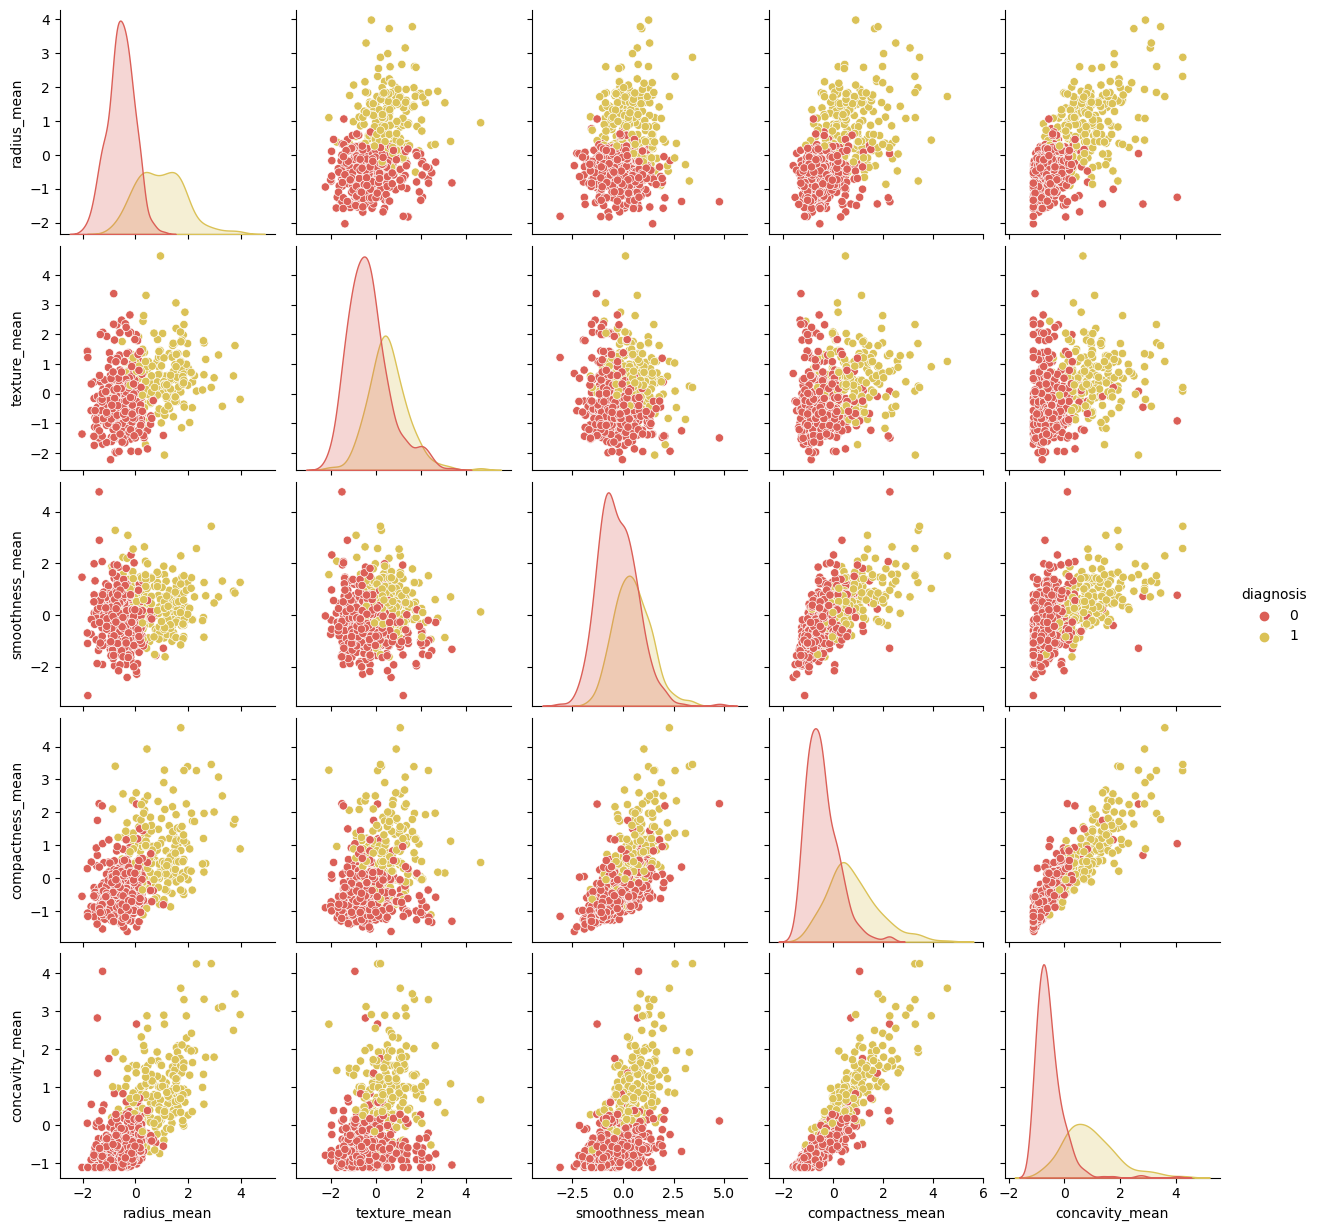

In [21]:
sns.pairplot(bc_dataset1, hue = "diagnosis", vars =['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean'])
plt.show()


Text(0.5, 1.0, 'Correlated Heatmap on reduction')

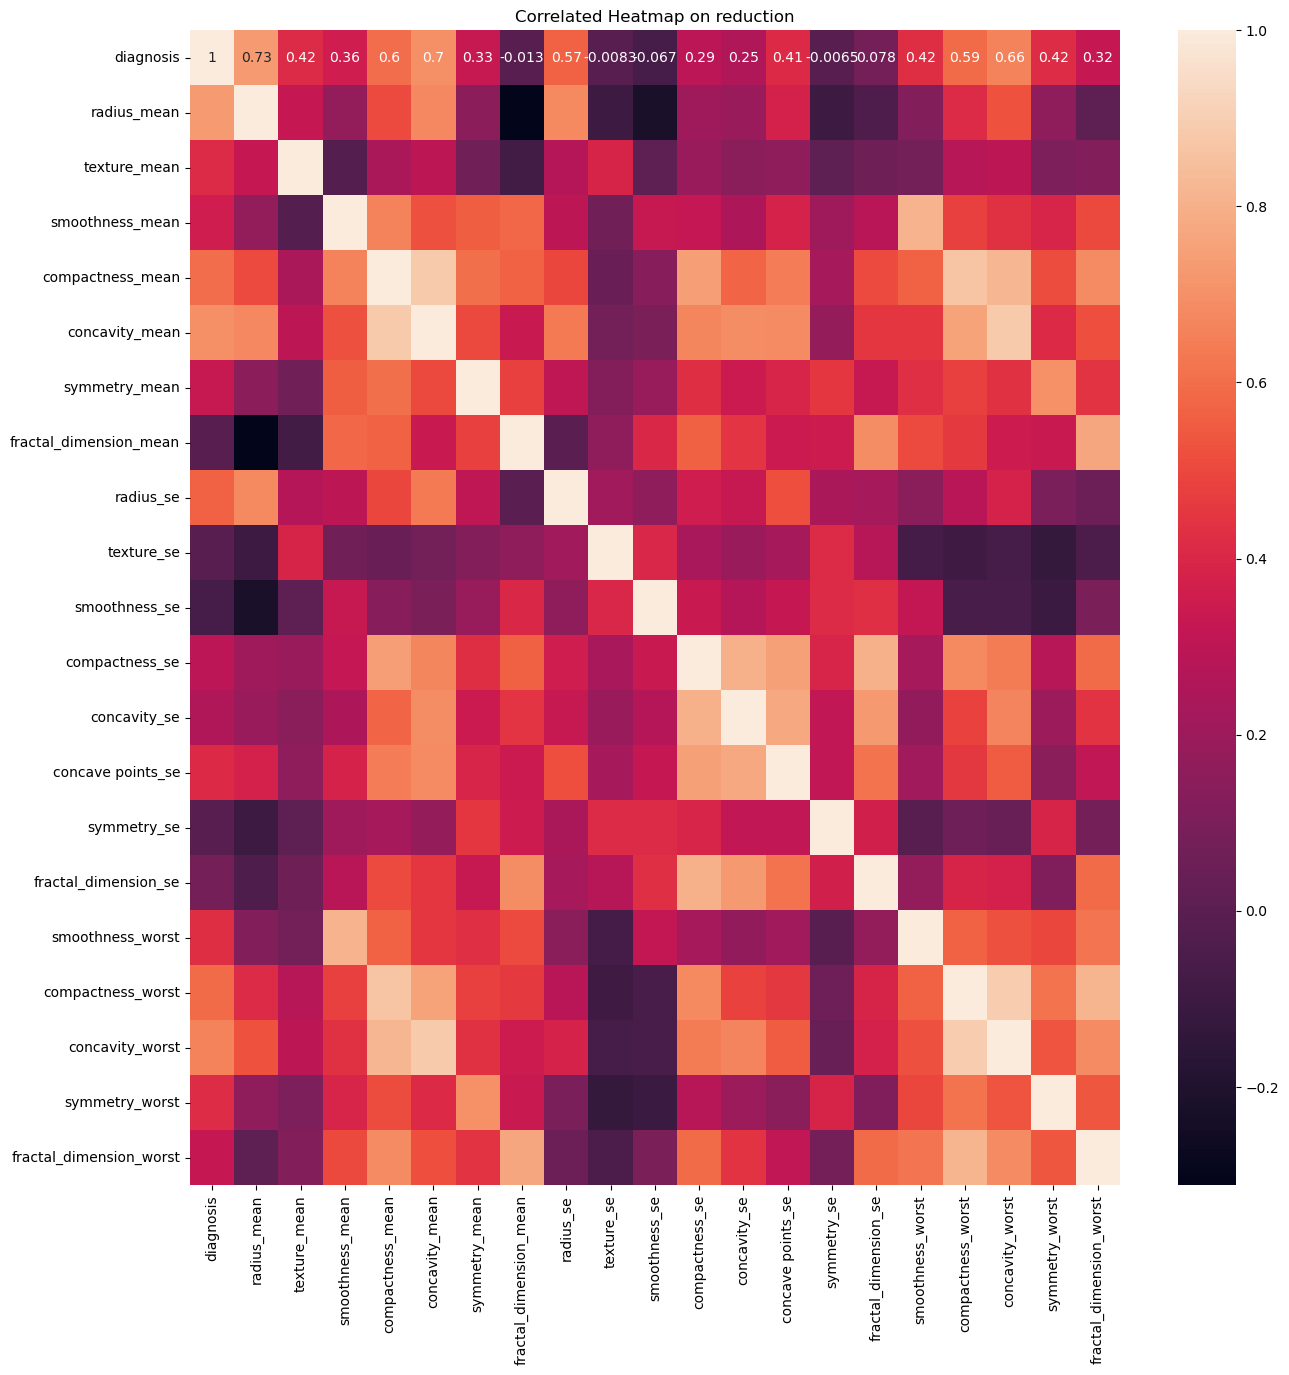

In [22]:
#and a heatmap next
plt.figure(figsize=(15,15))
sns.heatmap(bc_dataset1.corr(), annot=True).set_title('Correlated Heatmap on reduction')

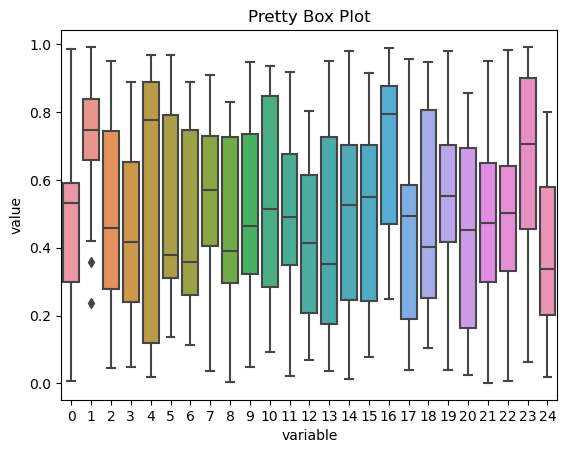

In [23]:
#and finally box plot for features

df = pd.DataFrame(data = np.random.random(size=(15,25)))

sns.boxplot(x="variable", y="value", data=pd.melt(df)).set_title("Pretty Box Plot")

plt.show()